In [3]:
# importing python modules and libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [4]:
# creating a dataframe and reading the data

df1 = pd.read_csv("Delhi_v2.csv")
df1.head()


,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [5]:
df1.shape

(7738, 18)

In [6]:
# cleaning unwanted columns

df2 = df1.drop(['Address', 'latitude','longitude', 'Status', 'Furnished_status', 'Landmarks', 'desc', 'type_of_building', 'neworold'], axis='columns')
unnamed_columns = [col for col in df2.columns if col.startswith("Unnamed")]
df2.drop(columns=unnamed_columns, inplace=True)
df2.head()

,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
0,5600000.0,1350.0,3.0,3.0,NaN,NaN,2.0,4148.148148
1,8800000.0,1490.0,3.0,3.0,NaN,NaN,2.0,5906.040268
2,16500000.0,2385.0,4.0,5.0,NaN,1.0,NaN,6918.238994
3,3810000.0,1050.0,2.0,2.0,3.0,1.0,2.0,3628.571429
4,6200000.0,1350.0,2.0,2.0,3.0,1.0,3.0,4592.592593


In [7]:
# finding null values

df2.isnull().sum()
df3 = df2.copy()

In [8]:
# filling null values

median_Balcony = df3['Balcony'].median(numeric_only=True)
median_parking = df3['parking'].median(numeric_only=True)
median_Lift = df3['Lift'].median(numeric_only=True)
df3['Balcony'] = df3['Balcony'].fillna(median_Balcony)
df3['parking'] = df3['parking'].fillna(median_parking)
df3['Lift'] = df3['Lift'].fillna(median_Lift)




In [9]:
df2.isnull().sum()

price            0
area             0
Bedrooms         0
Bathrooms        0
Balcony       2572
parking       5126
Lift          6005
Price_sqft       0
dtype: int64

In [10]:
# changing price to scale from 1 lkh

df3['price']= df3['price']/100000

In [11]:
df3.head()

,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
0,56.0,1350.0,3.0,3.0,2.0,1.0,2.0,4148.148148
1,88.0,1490.0,3.0,3.0,2.0,1.0,2.0,5906.040268
2,165.0,2385.0,4.0,5.0,2.0,1.0,2.0,6918.238994
3,38.1,1050.0,2.0,2.0,3.0,1.0,2.0,3628.571429
4,62.0,1350.0,2.0,2.0,3.0,1.0,3.0,4592.592593


In [12]:
df3['Bedrooms'].unique()

array([ 3.,  4.,  2.,  5.,  6., 10.,  7.,  8.,  9.])

In [13]:
# finding errors in the data

df3[df3.Bedrooms>9]

,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
151,450.0,9000.0,10.0,10.0,10.0,10.0,2.0,5000.000000
316,350.0,8500.0,10.0,7.0,7.0,3.0,2.0,4117.647059
1375,225.0,507.0,10.0,6.0,2.0,1.0,2.0,44378.698225
1788,250.0,3744.0,10.0,8.0,4.0,1.0,2.0,6677.350427
2207,225.0,540.0,10.0,10.0,5.0,3.0,2.0,41666.666667
2619,93.5,900.0,10.0,7.0,6.0,1.0,2.0,10388.888889
3122,300.0,6140.0,10.0,7.0,4.0,1.0,2.0,4885.993485
3179,90.0,1300.0,10.0,8.0,3.0,1.0,2.0,6923.076923
3641,120.0,1350.0,10.0,4.0,4.0,1.0,2.0,8888.888889
4138,125.0,1800.0,10.0,5.0,2.0,1.0,2.0,6944.444444


In [14]:
df2.area.unique()

array([1350., 1490., 2385., ..., 2374., 1692., 1898.])

In [15]:
df2.Bathrooms.unique()

array([ 3.,  5.,  2.,  4.,  6., 10.,  7.,  8.,  9.])

In [16]:
df2.Balcony.unique()

array([nan,  3.,  1.,  2.,  4.,  5., 10.,  7.,  8.,  6.,  9.])

In [17]:
df2.Price_sqft.unique()

array([4148.14814815, 5906.04026846, 6918.23899371, ..., 7214.61187215,
       4254.71698113, 3688.09272919])

In [18]:
df4 = df3.copy()
print(df4.dtypes)

price         float64
area          float64
Bedrooms      float64
Bathrooms     float64
Balcony       float64
parking       float64
Lift          float64
Price_sqft    float64
dtype: object


In [19]:
# finding outliers

df4[df4.area/df4.Bedrooms<300].head()

,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
10,73.0,850.0,3.0,2.0,1.0,2.0,1.0,8588.235294
42,24.0,540.0,2.0,2.0,1.0,1.0,0.0,4444.444444
47,48.0,1232.0,6.0,3.0,2.0,1.0,2.0,3896.103896
114,70.0,559.0,2.0,2.0,2.0,1.0,2.0,12522.361360
117,26.3,750.0,3.0,2.0,2.0,1.0,2.0,3506.666667


In [20]:
df4.shape

(7738, 8)

In [21]:
# removing outliers

df5 = df4[~(df4.area/df4.Bedrooms<300)]
df5.shape

(7451, 8)

In [22]:
df5.Price_sqft.describe()

count     7451.000000
mean      5498.470996
std       2259.931840
min       2100.000000
25%       3923.260950
50%       4948.453608
75%       6321.784150
max      25925.925926
Name: Price_sqft, dtype: float64

In [23]:
# removing pps outliers

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Bedrooms'):
        m = np.mean(subdf.Price_sqft)
        st = np.std(subdf.Price_sqft)
        reduced_df = subdf[(subdf.Price_sqft>(m-st)) & (subdf.Price_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(5887, 8)

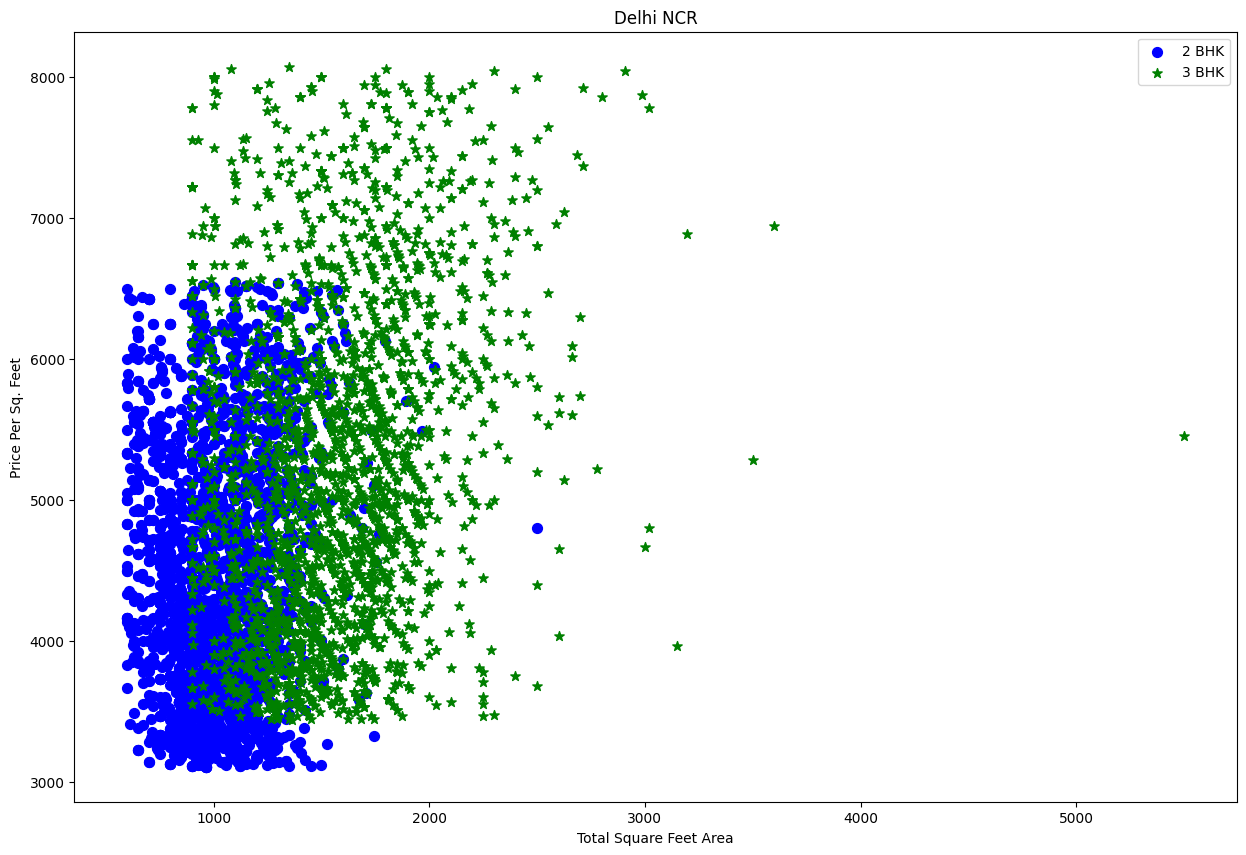

In [24]:
# scatter plot (total sq. feet vs price per sq. feet)

def plot_scatter_chart(df):
    bhk2 = df[df.Bedrooms == 2]
    bhk3 = df[df.Bedrooms == 3]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area, bhk2.Price_sqft, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.area, bhk3.Price_sqft, marker = '*', color = 'green', label = '3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Sq. Feet")
    plt.title("Delhi NCR")
    plt.legend()

plot_scatter_chart(df6)

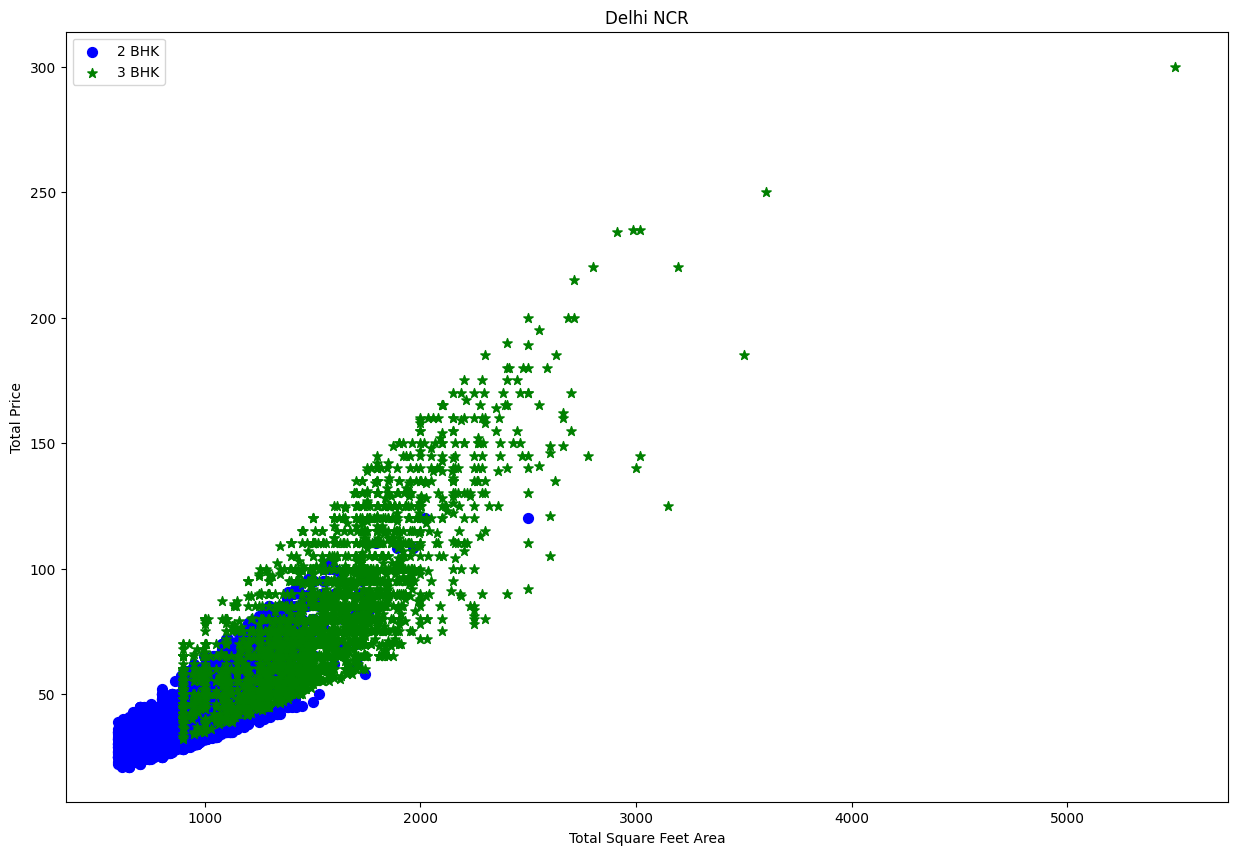

In [25]:
# scatter plot (total sq. feet vs total price)

def plot_scatter_chart(df):
    bhk2 = df[df.Bedrooms == 2]
    bhk3 = df[df.Bedrooms == 3]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area, bhk2.price, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.area, bhk3.price, marker = '*', color = 'green', label = '3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Total Price")
    plt.title("Delhi NCR")
    plt.legend()

plot_scatter_chart(df6)

In [26]:
# removing bedroom outliers

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    bhk_stats = {}
    for bhk, bhk_df in df.groupby('Bedrooms'):
        bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.Price_sqft),
            'std': np.std(bhk_df.Price_sqft),
            'count': bhk_df.shape[0]
        }
    for bhk, bhk_df in df.groupby('Bedrooms'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
            exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(5009, 8)

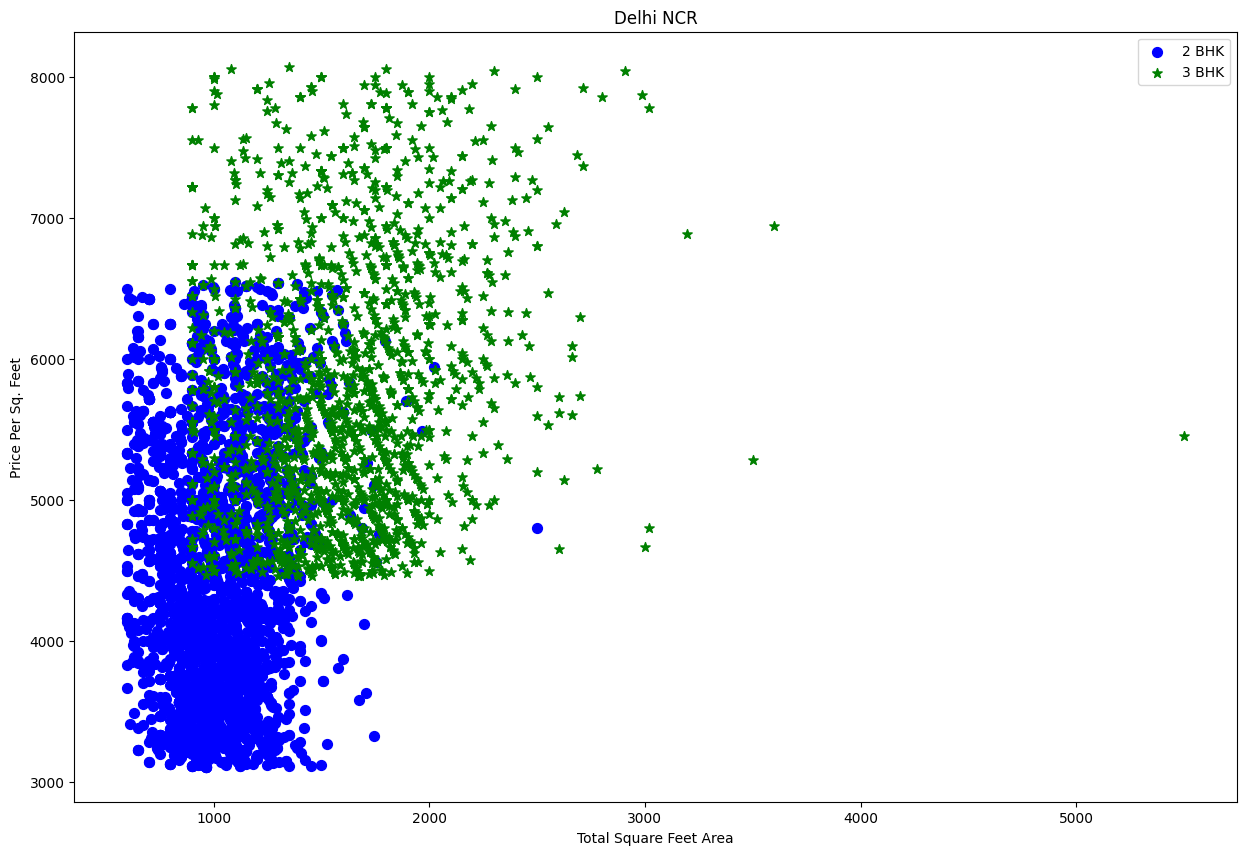

In [27]:
# scatter plot (total sq. feet vs price per sq. feet)

def plot_scatter_chart(df):
    bhk2 = df[df.Bedrooms == 2]
    bhk3 = df[df.Bedrooms == 3]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area, bhk2.Price_sqft, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.area, bhk3.Price_sqft, marker = '*', color = 'green', label = '3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Sq. Feet")
    plt.title("Delhi NCR")
    plt.legend()

plot_scatter_chart(df7)

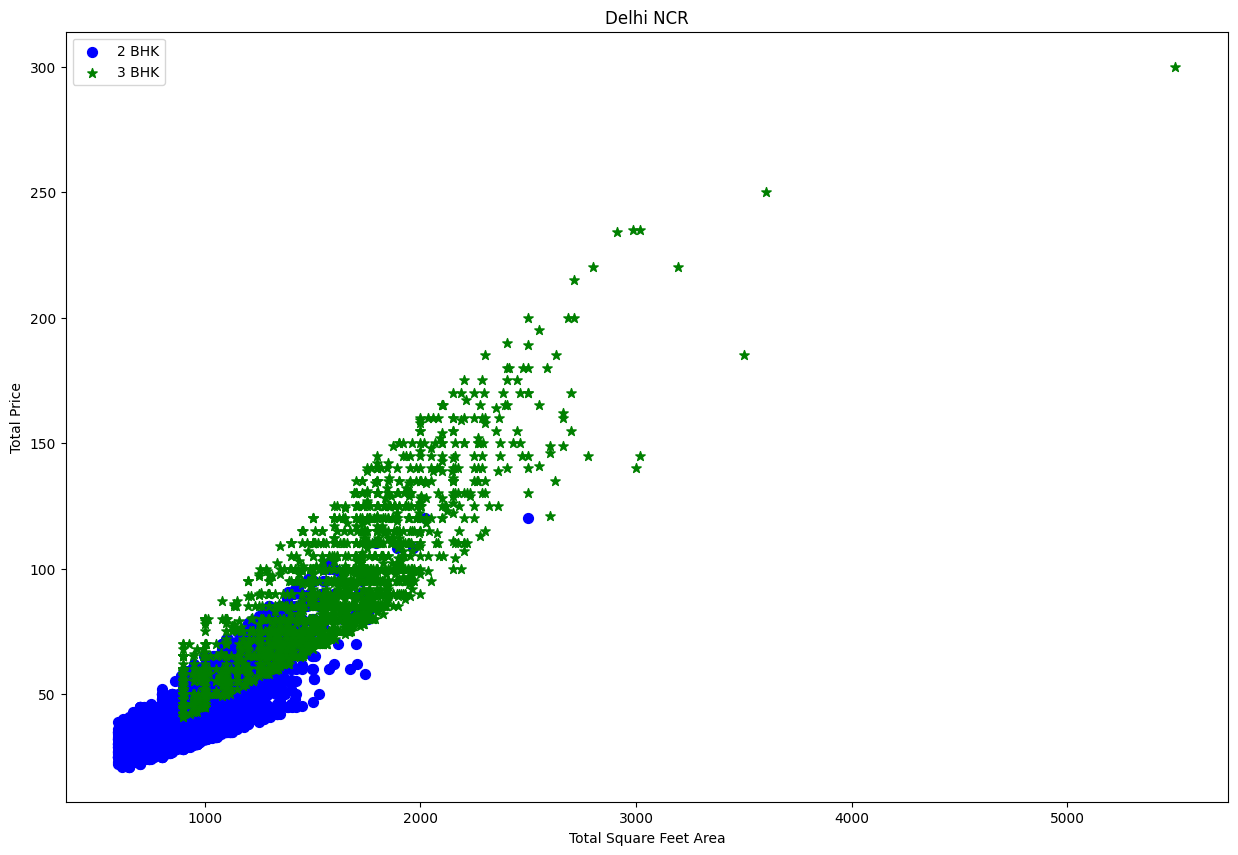

In [28]:
# scatter plot (total sq. feet vs total price)

def plot_scatter_chart(df):
    bhk2 = df[df.Bedrooms == 2]
    bhk3 = df[df.Bedrooms == 3]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area, bhk2.price, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.area, bhk3.price, marker = '*', color = 'green', label = '3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Total Price")
    plt.title("Delhi NCR")
    plt.legend()

plot_scatter_chart(df7)

Text(0, 0.5, 'Count')

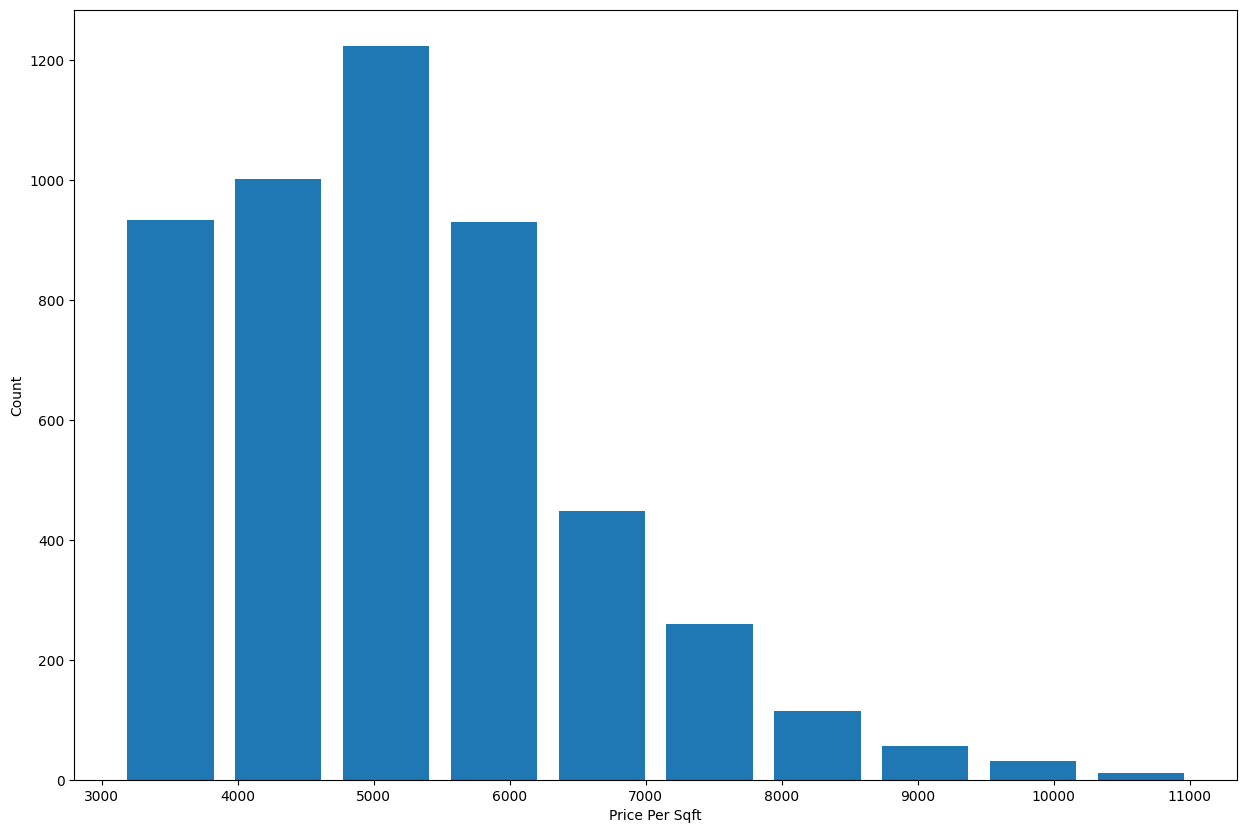

In [29]:
plt.hist(df7.Price_sqft, rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")

In [30]:
df8 = df7.drop('Price_sqft', axis='columns')
df8.head(3)

,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift
0,38.1,1050.0,2.0,2.0,3.0,1.0,2.0
1,62.0,1350.0,2.0,2.0,3.0,1.0,3.0
2,37.0,1150.0,2.0,2.0,3.0,1.0,2.0


In [31]:
X = df8.drop('price', axis = 'columns')
X.head()

,area,Bedrooms,Bathrooms,Balcony,parking,Lift
0,1050.0,2.0,2.0,3.0,1.0,2.0
1,1350.0,2.0,2.0,3.0,1.0,3.0
2,1150.0,2.0,2.0,3.0,1.0,2.0
3,890.0,2.0,2.0,3.0,1.0,2.0
4,850.0,2.0,2.0,1.0,1.0,2.0


In [32]:
y = df8.price
y.head()

0    38.1
1    62.0
2    37.0
3    32.7
4    39.9
Name: price, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =10)

In [34]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.9333884511791353

In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state =0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.90348888, 0.90617648, 0.89597447, 0.90855928, 0.88498181])

In [36]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X, y):
    algos = {
        'linear-reg' : {
            'model' : LinearRegression(),
            'params' : {
                'fit_intercept' : [True, False]
            }
        },
        'lasso': {
            'model' : Lasso(),
            'params' : {
                'alpha': [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision-tree': {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state =0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(X, y)

/home/mera/my-jupyter-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mera/my-jupyter-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mera/my-jupyter-env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/mera/my-jupyter-env/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  F

,model,best_score,best_params
0,linear-reg,0.899836,{'fit_intercept': True}
1,lasso,0.897648,"{'alpha': 1, 'selection': 'random'}"
2,decision-tree,0.885208,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [37]:
def predict_price(area, Bedrooms, Bathrooms, Balcony, parking, Lift):
    x = np.zeros(len(X.columns))
    x[0]=area
    x[1]=Bedrooms
    x[2]=Bathrooms
    x[3]=Balcony
    x[4]=parking
    x[5]=Lift
    return lr_clf.predict([x])[0]

In [38]:

predict_price(2000,3,2,1,1,1)

/home/mera/my-jupyter-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(132.62970485226413)

In [40]:
import pickle
with open('DelhiNCR_home_price_model', 'wb') as f:
    pickle.dump(lr_clf, f)

In [44]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))